<a href="https://colab.research.google.com/github/nilesh0109/ML_SoSe19/blob/master/ML_ex05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [0]:
data = np.loadtxt('dataCircle.txt')
df = pd.DataFrame(data, columns=['x1', 'x2', 'label'])

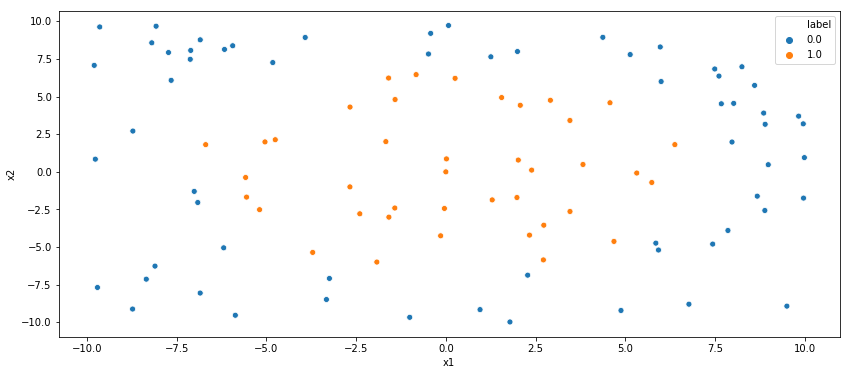

In [3]:
fig, ax= plt.subplots(1,1, figsize=(14,6))
sns.scatterplot(df['x1'], df['x2'], hue=df['label'], hue_norm=(0,1), ax=ax)

In [0]:
#Step 1
#Giving initial weights and changing labels from 0.0 to -1.0
data_len = len(data)
df['weights'] = 1/data_len
df = df.replace({'label': {0.0: -1.0}})
#print(df)

In [0]:
#step 2 Defining several weak classifiers hx > value and hy > value is correct
def get_weak_classifier(threshold, column_name, data):
  out1 = np.array([1.0 if item > threshold else -1.0 for item in data[column_name]])
  out2 = np.array([1.0 if item <= threshold else -1.0 for item in data[column_name]])
  num_correct_1 = np.sum(data['label'] == out1)
  num_correct_2 = np.sum(data['label'] == out2)
  #print(num_correct_1, '  ', num_correct_2)
  if(num_correct_2 > num_correct_1):
    rule = column_name + ' <= ' + str(threshold)
    out = out2
  else:
    rule = column_name + ' > ' + str(threshold)
    out=out1
  return (rule, out)
hx1 = np.arange(-10,12,1)
hx2 = np.arange(-10,12,1)
weak_classifiers = {}

for i in range(len(hx1)):
  rule, output=get_weak_classifier(hx1[i], 'x1', df)
  weak_classifiers.update({
     rule: output
  })

for i in range(len(hx2)):
  rule, output=get_weak_classifier(hx2[i], 'x2', df)
  weak_classifiers.update({
     rule: output
  })
#print(weak_classifiers)


In [0]:
def getErrorList(ground_truth, prediction):
  return np.array([0 if prediction[ind] == ground_truth[ind] else 1 for ind in range(len(prediction))])

def getLossParam(ground_truth, prediction):
  return np.array([1 if prediction[ind] == ground_truth[ind] else -1 for ind in range(len(prediction))])

In [7]:
#step 3 : Take the best week classifier

weight_alphas=[]
selected_classifiers_name = []
#print(indices_to_classify)

for j in range(35):
  lowest_error =100
  lowest_error_key= ''
  for rule, out in weak_classifiers.items():
    if(rule not in selected_classifiers_name):
      temp = getErrorList(df['label'], out)
      error_score = np.sum(temp * df['weights'])
      
      if error_score <= lowest_error:
        lowest_error_key = rule
        lowest_error = error_score
        #lowest_error_temp = temp
  #print(lowest_error_temp)      
  #indices_to_classify = np.where(lowest_error_temp == 1)[0]
 # print(np.shape(indices_to_classify))
  #print('--------------------------')
  #print(indices_to_classify)
  #print(np.shape(indices_to_classify))
  print('best weak classifier is ', lowest_error_key)
  alpha = 0.5 * np.log((1 - lowest_error)/lowest_error)
  weight_alphas.append(alpha)
  selected_classifiers_name.append(lowest_error_key)
  print('error is', lowest_error)
  print('alpha is', alpha)
  loss_param= getLossParam(df['label'], weak_classifiers[lowest_error_key])
  new_weight = np.exp(-alpha * loss_param)
  df['weights'] = new_weight/np.sum(new_weight)


best weak classifier is  x2 <= 5
error is 0.3823529411764706
alpha is 0.23978654013094314
best weak classifier is  x2 > 11
error is 0.3321123321123321
alpha is 0.34932336806299197
best weak classifier is  x2 <= 7
error is 0.29485855874457995
alpha is 0.43595131455268
best weak classifier is  x2 > 10
error is 0.24931255728689292
alpha is 0.5511410087785357
best weak classifier is  x1 <= 7
error is 0.2356924068998872
alpha is 0.5882213612961971
best weak classifier is  x2 <= -10
error is 0.20157106862309176
alpha is 0.6882519719752179
best weak classifier is  x1 <= 6
error is 0.2084956637758505
alpha is 0.6670085570053652
best weak classifier is  x1 > 11
error is 0.1925683827649574
alpha is 0.7167035205914083
best weak classifier is  x1 > -6
error is 0.20108514019870974
alpha is 0.6897629900954139
best weak classifier is  x1 > 10
error is 0.18696946143494422
alpha is 0.7349116879845526
best weak classifier is  x2 > -6
error is 0.1992043007330851
alpha is 0.6956374612489074
best weak clas

In [0]:
def getAccuracy(classifier_pred):
  classifier_pred_val = [1.0 if val >= 0 else -1.0 for val in classifier_pred]
  correct = np.sum(df['label'] == classifier_pred_val)
  return (correct * 100 /len(data), classifier_pred_val)

In [9]:
#final_classifier prediction
strong_classifier = 0.0
strongest_classifier ={'acc': 0.0, 'num_weak_classifiers':0, 'pred': []}
best_classifer_count = 0
print(weight_alphas)
# for i in range(len(weight_alphas)):
#   strong_classifier += weight_alphas[i] * weak_classifiers[selected_classifiers_name[i]]

for i in range(len(weight_alphas)):
  strong_classifier += weight_alphas[i] * weak_classifiers[selected_classifiers_name[i]]
  current_classifier_acc, curr_prediction = getAccuracy(strong_classifier)
  #print('iteration %d'% i, ' Accuracy is ', current_classifier_acc)
  if( current_classifier_acc > strongest_classifier['acc']):
    strongest_classifier['acc'] = current_classifier_acc
    strongest_classifier['num_weak_classifiers'] = i+1
    strongest_classifier['pred'] = curr_prediction
    
    
print(strongest_classifier['acc'])
print(strongest_classifier['num_weak_classifiers'])
wrong_pred_indices = np.where(strongest_classifier['pred'] != df['label'])
print(wrong_pred_indices[0])

#strong_classifier = [1.0 if val >= 0 else -1.0 for val in strong_classifier]
#print(np.array(strong_classifier))
#correct = np.sum(df['label'] == strong_classifier)
#print('accuracy is ', correct * 100 /len(data))

[0.23978654013094314, 0.34932336806299197, 0.43595131455268, 0.5511410087785357, 0.5882213612961971, 0.6882519719752179, 0.6670085570053652, 0.7167035205914083, 0.6897629900954139, 0.7349116879845526, 0.6956374612489074, 0.8144699560433848, 0.7693220471403883, 0.8268115179435329, 0.6498839851328915, 0.7005749509858143, 0.5886289011226891, 0.4961607471386729, 0.3908193381694241, 0.36545137029447644, 0.41976403041859695, 0.29926445888489106, 0.2724072568063976, 0.21432574421130457, 0.21947517644402217, 0.20452137872204784, 0.3267102054504735, 0.16755454183443994, 0.23319924665312586, 0.18991208180125446, 0.11378623811784862, 0.2120061043017993, 0.13111668889187725, 0.22594836648065017, 0.12194853532622403]
93.13725490196079
11
[ 5 19 21 31 36 56 78]


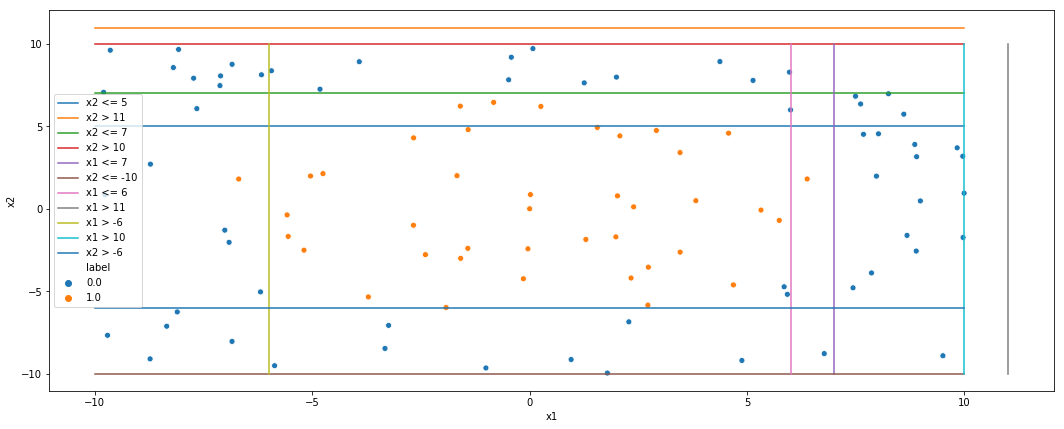

In [13]:
df = df.replace({'label': {-1.0: 0.0}})
fig, ax= plt.subplots(1,1, figsize=(18,7))

sns.scatterplot(df['x1'], df['x2'], hue=df['label'], ax=ax, hue_norm=(0,1))
for i in range(strongest_classifier['num_weak_classifiers']):
  classifer_eq = selected_classifiers_name[i]
  #print(classifer_eq)
  reg_exp = re.match("^(x[1,2]).* ([-\d\.]+)$", classifer_eq)
  column_name = reg_exp.group(1)
  inequality_value = reg_exp.group(2)
  X = np.arange(-10,11) if column_name == 'x2' else [float(inequality_value)]* 21
  y = np.arange(-10,11) if column_name == 'x1' else [float(inequality_value)]* 21
  ax.plot(X, y, label=classifer_eq)
  plt.legend()
plt.show()

